# EDA Datos abiertos Acceso a Internet - Argentina

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Problema a resolver: Realizar un análisis completo para conocer el comportamiento del sector de las telecomunicaciones con énfasis en el acceso a internet en Argentina. Los datos proporcionados son los datos abiertos que publica el gobierno argentino en [Datos Abiertos](https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/)


### Objetivos:

- Conocer e Identificar los tipos de datos
- Visualizar los datos y analizar las posbiles interacciones entre las variables
- Crear y cargar una base de datos SQL
- Diseñar un dashboard para la correcta visualización de métricas y kpis

### El Primer set de datos hace referencia a la penetración de internet fijo - Acceso por cada 100 hogares

In [2]:
penetracion = pd.read_csv('data/Internet_Penetracion.csv')

In [3]:
penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [4]:
penetracion['Provincia'].unique() # Tenemos 23 provincias y la Ciudad Autónoma de Buenos Aires

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [5]:
penetracion

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"
...,...,...,...,...
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"


In [6]:
# Reemplazar comas por puntos en la columna "Accesos por cada 100 hogares"
penetracion['Accesos por cada 100 hogares'] = penetracion['Accesos por cada 100 hogares'].str.replace(',', '.')

# Convertir la columna a float
penetracion['Accesos por cada 100 hogares'] = penetracion['Accesos por cada 100 hogares'].astype(float)
# Configurar la opción de formato de decimales
pd.set_option('display.float_format', '{:.2f}'.format)


In [7]:
penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [8]:
penetracion.shape # 24 provincias x 9 años x 4 trimestres = 864 valores. Faltan 24.

(840, 4)

In [9]:
penetracion['Año'].value_counts() # los 24 Datos que faltan son del año 2022

2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
2022    72
Name: Año, dtype: int64

In [10]:
penetracion['Trimestre'].value_counts() # Esto nos indica que no se reportó el último trimestre de 2022

3    216
2    216
1    216
4    192
Name: Trimestre, dtype: int64

In [11]:
penetracion['Accesos por cada 100 hogares'].describe() # En promedio 49 de cada 100 hogares tienen acceso a internet en Argentina

count   840.00
mean     49.07
std      23.15
min       9.35
25%      32.11
50%      45.90
75%      61.87
max     124.06
Name: Accesos por cada 100 hogares, dtype: float64

In [12]:
mask = penetracion['Accesos por cada 100 hogares']<10 # Mascara para ver trimestres con menos de 10 hogares por cada 100
penetracion[mask]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
522,2017,2,San Luis,9.51
546,2017,1,San Luis,9.55
570,2016,4,San Luis,9.64
594,2016,3,San Luis,9.63
618,2016,2,San Luis,9.60
642,2016,1,San Luis,9.59
666,2015,4,San Luis,9.71
690,2015,3,San Luis,9.71
714,2015,2,San Luis,9.71
738,2015,1,San Luis,9.72


In [13]:
mask = penetracion['Accesos por cada 100 hogares']>100 # Mascara para ver trimestres con más de 100 hogares por cada 100
penetracion[mask]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2022,3,Capital Federal,122.28
25,2022,2,Capital Federal,121.31
49,2022,1,Capital Federal,111.80
73,2021,4,Capital Federal,111.27
97,2021,3,Capital Federal,111.27
121,2021,2,Capital Federal,110.14
145,2021,1,Capital Federal,108.42
169,2020,4,Capital Federal,108.31
193,2020,3,Capital Federal,107.68
217,2020,2,Capital Federal,106.41


In [14]:
# Viendo la anterior información considero importante graficar la evolución del promedio de acceso a internet año a año por cada provincia

# Esta función nos permitirá hacer un gráfico por cada provincia
def grafico_tendencia_accesos(penetracion, provincia_deseada):
    # Filtrar los datos para la provincia deseada
    datos_provincia = penetracion[penetracion['Provincia'] == provincia_deseada]

    # Agrupar los datos por año y calcular el promedio de accesos
    grouped = datos_provincia.groupby('Año')['Accesos por cada 100 hogares'].mean()

    # Crear el gráfico de línea
    plt.plot(grouped.index, grouped.values, marker='o')

    # Agregar etiquetas y título al gráfico
    plt.xlabel('Año')
    plt.ylabel('Accesos por cada 100 hogares')
    plt.title('Tendencia de Accesos en {}'.format(provincia_deseada))

    # Mostrar el gráfico
    plt.show()

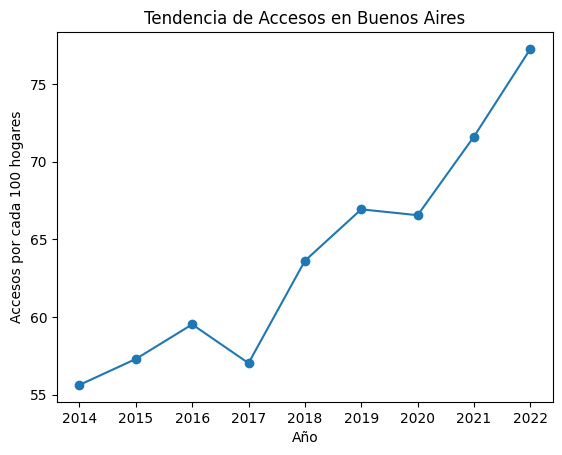

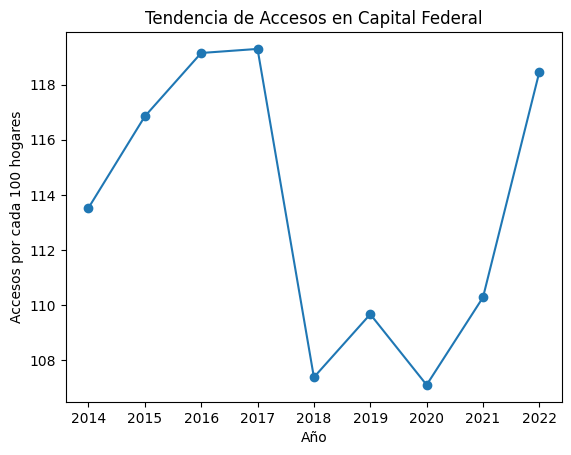

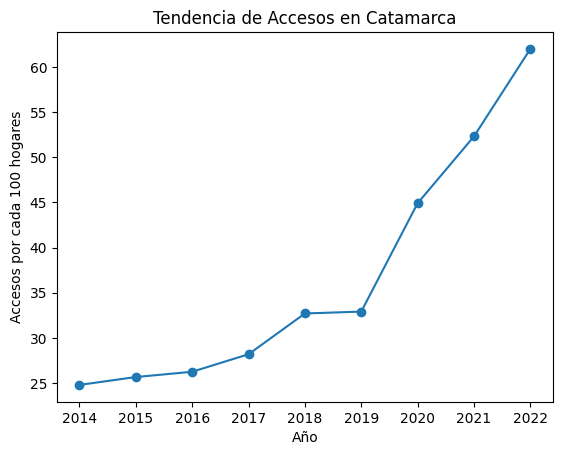

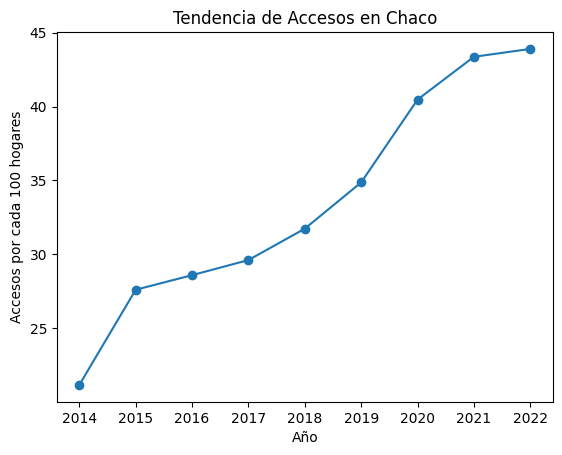

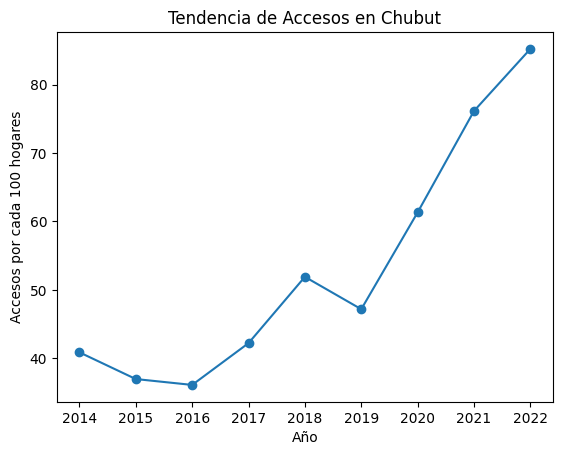

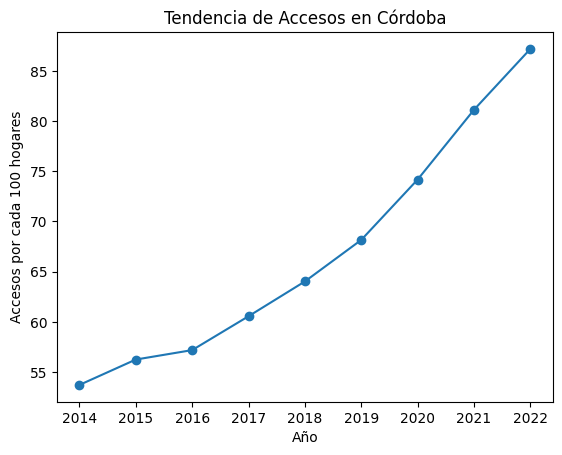

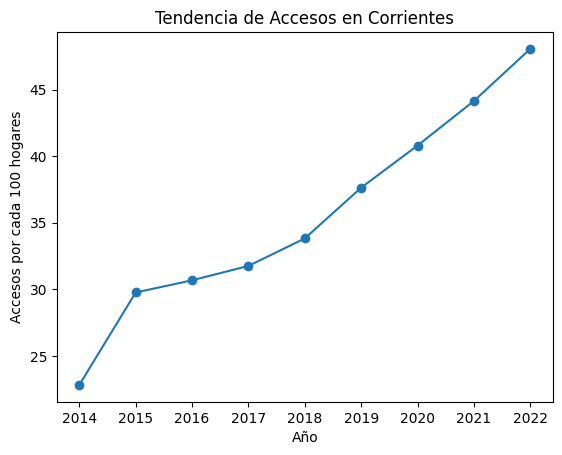

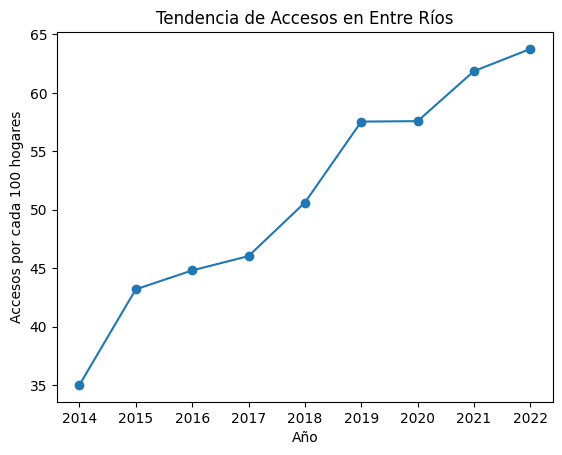

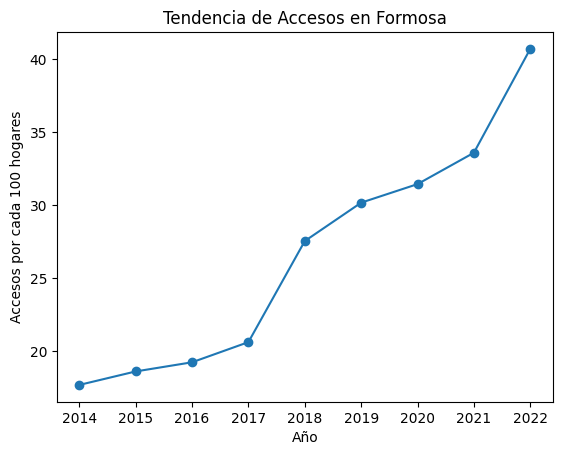

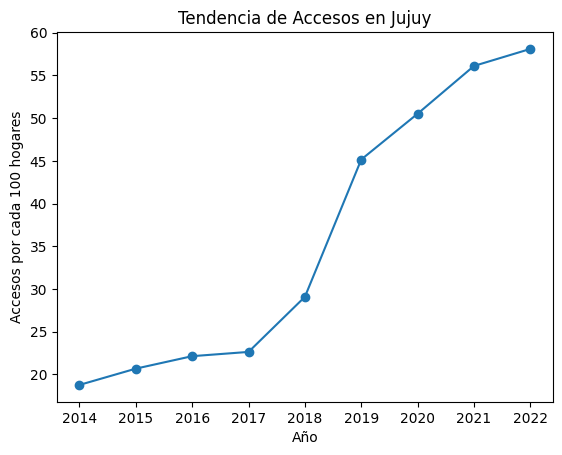

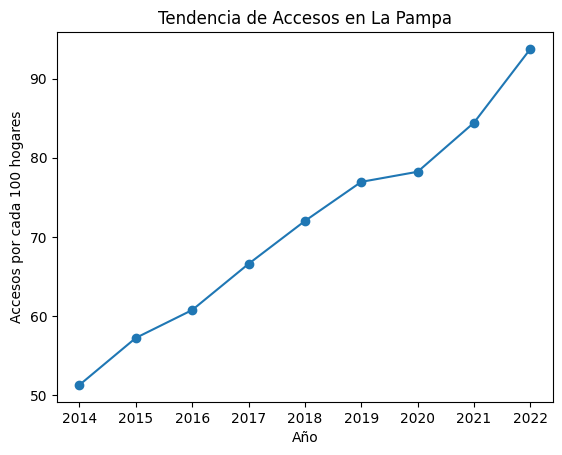

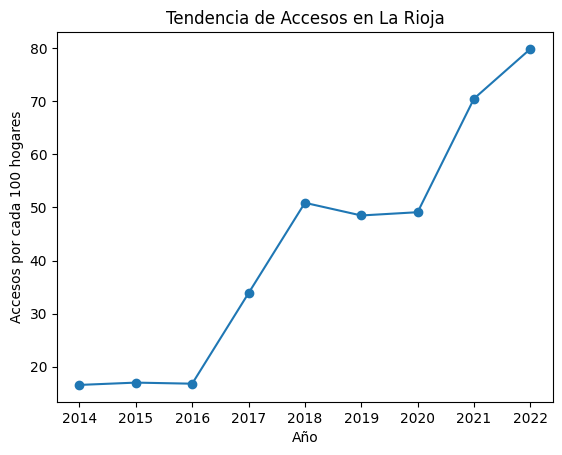

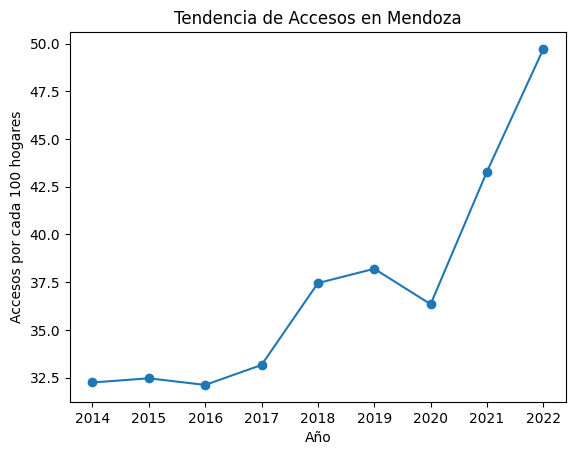

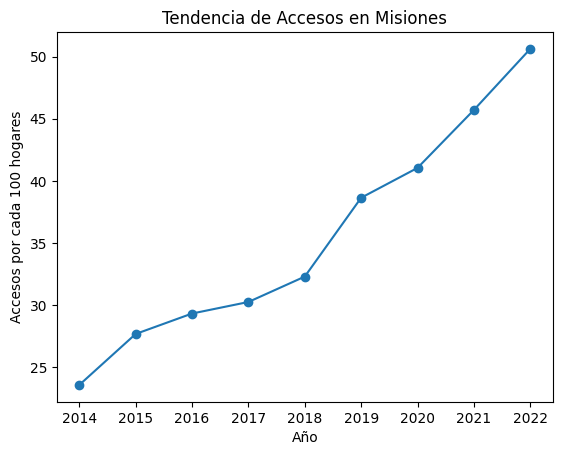

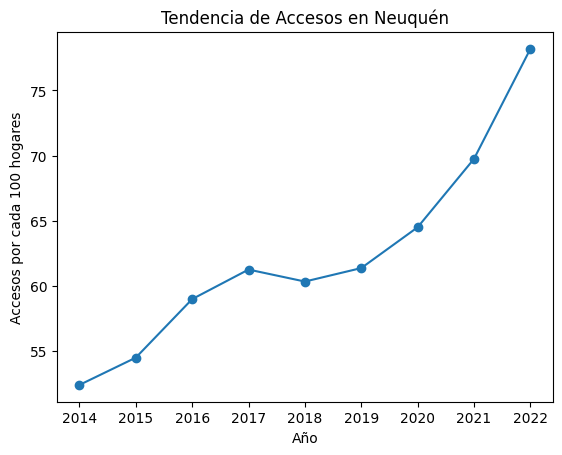

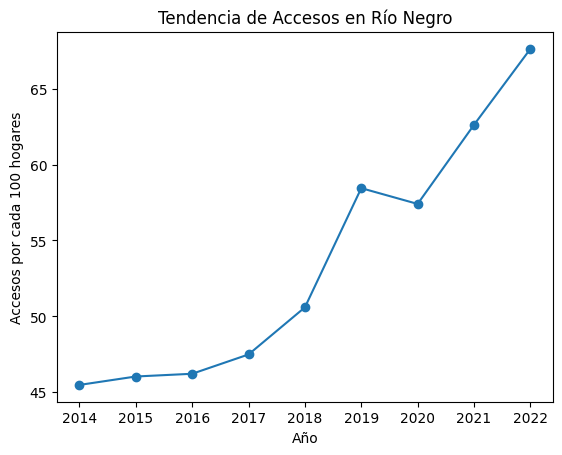

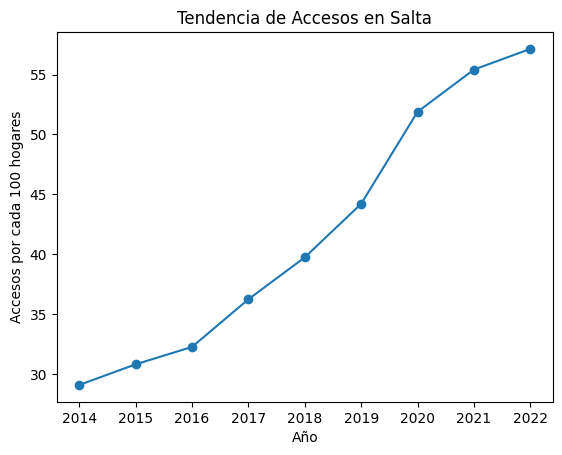

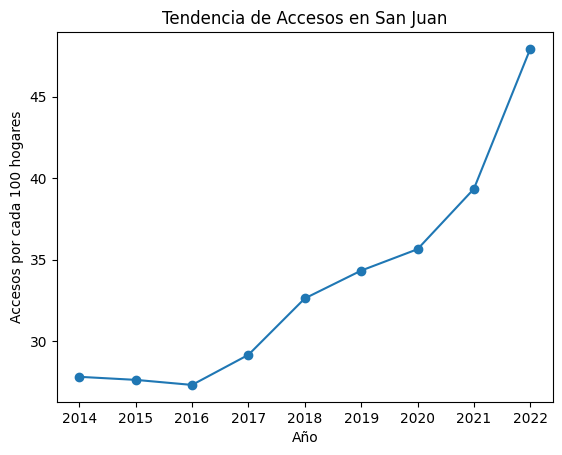

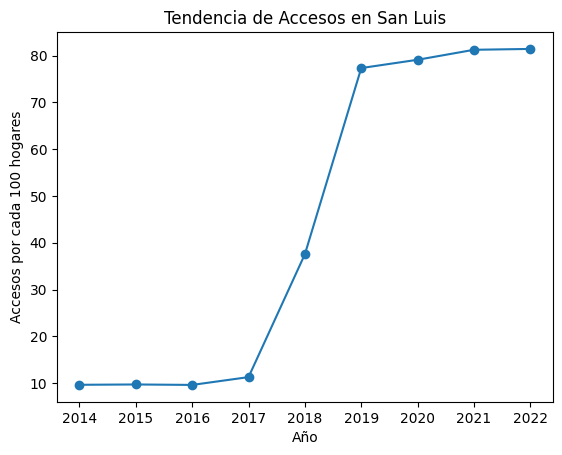

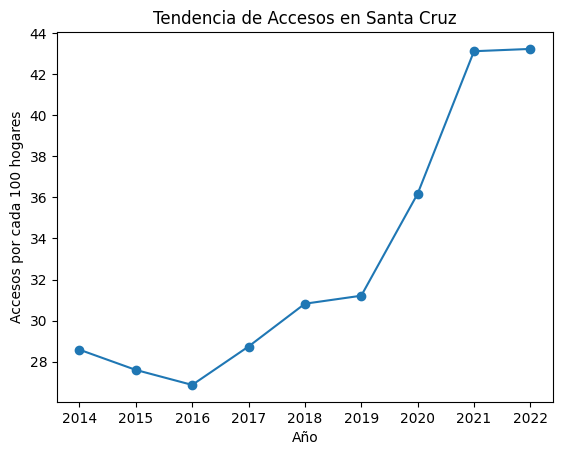

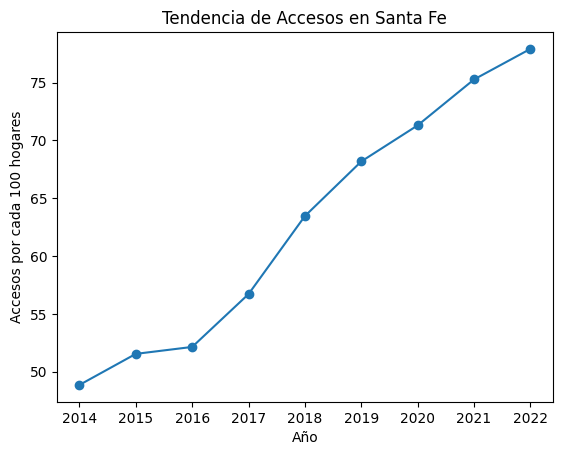

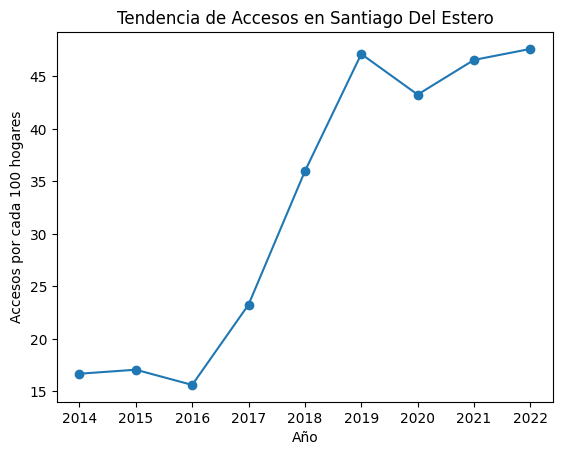

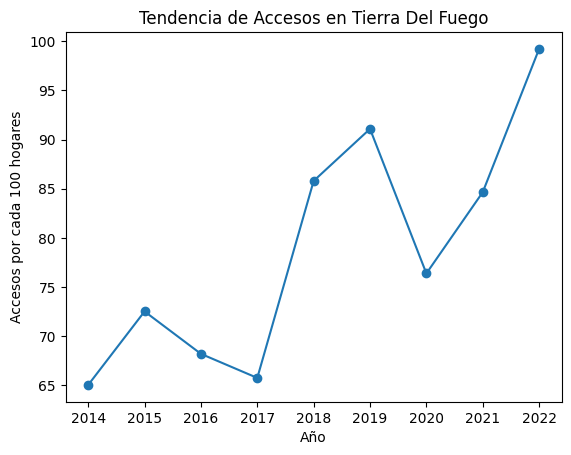

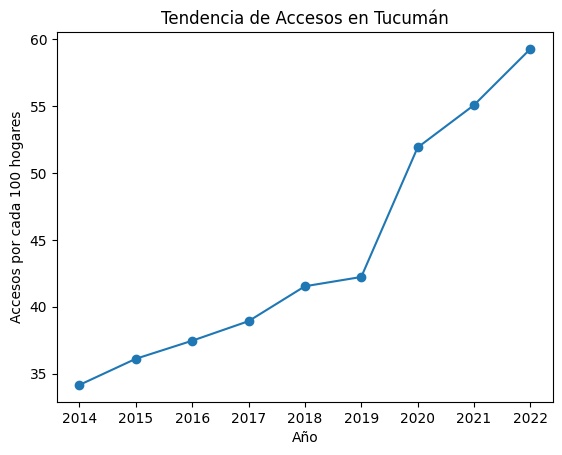

In [15]:
# Aplico un ciclo for para que se grafiquen todas las provincias automáticamente
provincias = penetracion['Provincia'].unique()

# Generar un gráfico de tendencia para cada provincia
for provincia in provincias:
    grafico_tendencia_accesos(penetracion, provincia)

Es interesante el crecimiento de algunas provincias como San Luis que en principio tenía los valores mínimos de penetración y mejoró drásticamente. Por otra parte está Capital Federal que está por encima de 100 (hay hogares con más de una conexión fija a internet).
Se observa también en Argentina un crecimiento de la penetración a partir de los años 2017 y 2018

### En los anteriores gráficos se puede observar con claridad la tendencia de crecimiento en la penetración del Internet por cada provincia en Argentina. En este sentido puede haber una posible oportunidad en las provincias que aún están por debajo del 60% de penetración.

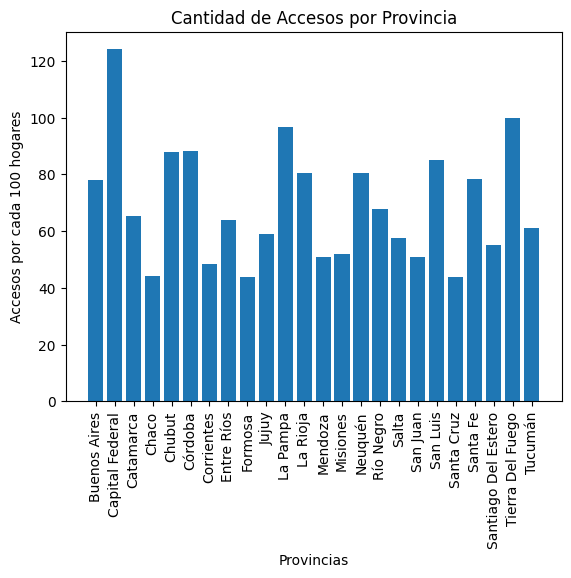

In [16]:
# Promedio total de penetración por provincia: Capital Federal está por encima de 100. Chaco, Formosa y Santa Cruz son los de menor penetración

plt.bar(penetracion['Provincia'], penetracion['Accesos por cada 100 hogares'])
plt.xlabel('Provincias')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Cantidad de Accesos por Provincia')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

plt.show()

In [17]:
# Agrupamos por provincia para obtener el promedio de penetración y se filtran aquellas por debajo del 60%
oportunidad = penetracion.groupby('Provincia')['Accesos por cada 100 hogares'].mean()
oportunidad[oportunidad < 60]

Provincia
Catamarca             35.91
Chaco                 33.18
Chubut                52.19
Corrientes            35.14
Entre Ríos            50.80
Formosa               26.21
Jujuy                 35.28
La Rioja              41.50
Mendoza               36.86
Misiones              35.02
Río Negro             53.14
Salta                 41.43
San Juan              33.13
San Luis              43.03
Santa Cruz            32.64
Santiago Del Estero   32.15
Tucumán               43.64
Name: Accesos por cada 100 hogares, dtype: float64

In [18]:
# Se obtiene el promedio de penetración de todas las provincias por debajo de 60 conexiones por cada 100 hogares
oportunidad[oportunidad < 60].mean()

38.89606722689076

## KPI: 
### Hay 17 Provincias con una penetración inferior al 60% lo que podría indicar que allí hay mayores oportunidades de crecimiento en términos de mejora de infraestructura, ampliar la conectividad y desarrollar estrategias de venta.
### El promedio de penetración de las 17 Provincias es del 39%

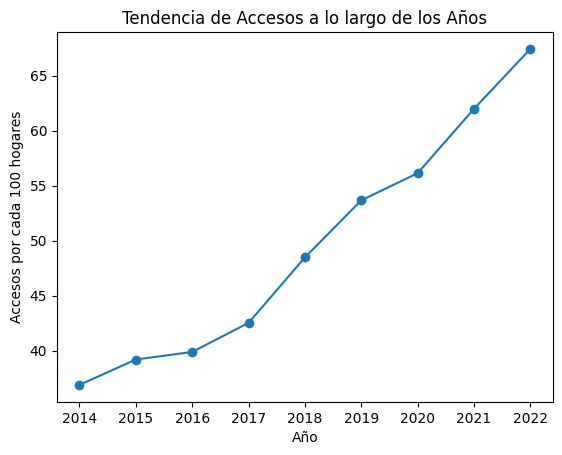

In [19]:

# Agrupar los datos por año y calcular el promedio de accesos
grouped = penetracion.groupby('Año')['Accesos por cada 100 hogares'].mean()  
# Crear el gráfico de línea
plt.plot(grouped.index, grouped.values, marker='o')
plt.xlabel('Año')  
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Tendencia de Accesos a lo largo de los Años')

# Mostrar el gráfico
plt.show()

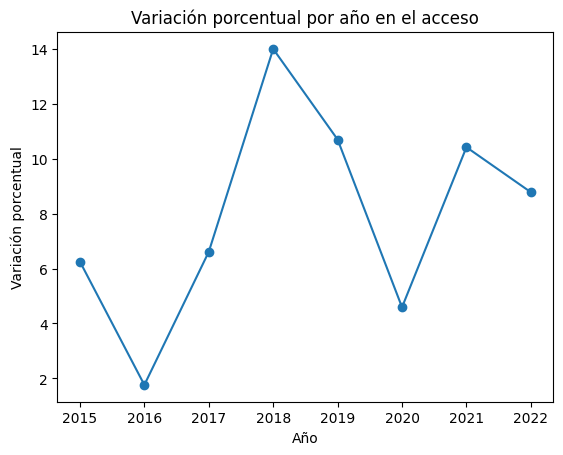

In [20]:
# Agrupar los datos por año y calcular el promedio de accesos
grouped = penetracion.groupby('Año')['Accesos por cada 100 hogares'].mean()  

variacion = np.round((grouped.pct_change() * 100), 2)

# Crear el gráfico de línea
plt.plot(grouped.index, variacion, marker='o')
plt.xlabel('Año')  
plt.ylabel('Variación porcentual')
plt.title('Variación porcentual por año en el acceso')

# Mostrar el gráfico
plt.show()

In [21]:
variacion.mean()

7.88875

En el primer gráfico se puede notar un crecimiento constante en la penetración de internet en los hogares de Argentina. En términos de crecimiento porcentual año a año se observa el mayor pico en 2018 en un 14%, una posterior caída cerca al 4% y una recuperación en pandemia hasta casi superar el 10% de crecimiento en 2021.
En promedio, la penetración ha crecido al 7.8% anual

# El Segundo set de datos hace referencia a la penetración de internet fijo - **Nivel Nacional**

In [25]:
# Carga segundo set de datos contiene información de penetración a nivel nacional, incluye acceso por cada 100 hab
penetracionnacional = pd.read_csv('data/Internet_Penetracion1.csv')

In [26]:
penetracionnacional.head() # Reporte hasta el 3 trimestre de 2022

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


In [28]:
penetracionnacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [29]:
# Formateando los float
penetracionnacional['Accesos por cada 100 hogares'] = penetracionnacional['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
penetracionnacional['Accesos por cada 100 hab'] = penetracionnacional['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)
pd.set_option('display.float_format', '{:.2f}'.format)



In [30]:
penetracionnacional[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].describe()

,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.00,35.00
mean,60.28,18.61
std,8.15,2.66
min,49.55,15.05
25%,52.98,16.25
50%,59.16,18.24
75%,66.05,20.48
max,76.64,23.95


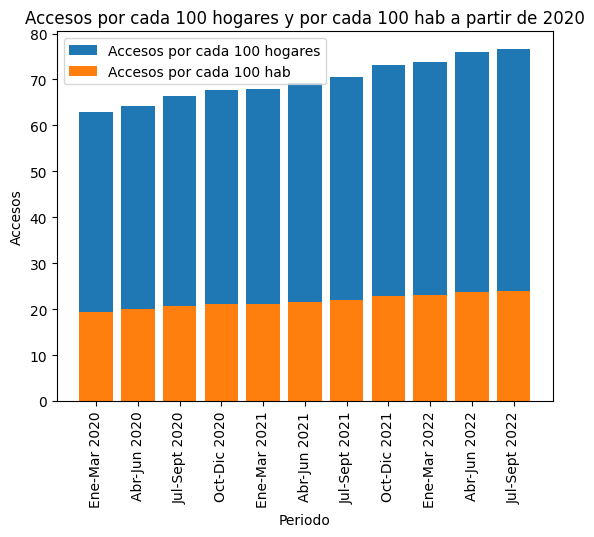

In [31]:
# Visualización acceso por cada 100 hogares y cada 100 habitantes: Se encuentra que el acceso en razón a los habitantes es menor y esto se puede dar por el tamaño promedio de los hogares (conformados por dos o más personas) y se da un uso compartido de accesos (en un hogar una sola conexión es compartida por varias personas)

# Filtrar los datos a partir de 2020
penetracionnacional_filtrado = penetracionnacional[penetracionnacional['Año'] >= 2020]

# Ordenar los datos por año y trimestre
penetracionnacional_filtrado = penetracionnacional_filtrado.sort_values(['Año', 'Trimestre'])

# Crear el gráfico de barras
plt.bar(penetracionnacional_filtrado['Periodo'], penetracionnacional_filtrado['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares')
plt.bar(penetracionnacional_filtrado['Periodo'], penetracionnacional_filtrado['Accesos por cada 100 hab'], label='Accesos por cada 100 hab')

# Agregar etiquetas y título al gráfico
plt.xlabel('Periodo')
plt.ylabel('Accesos')
plt.title('Accesos por cada 100 hogares y por cada 100 hab a partir de 2020')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### El Tercer set de datos Accesos por banda ancha fija y angosta a nivel nacional

In [32]:
# Cargar el 3 set de datos que contiene información de accesos por banda ancha fija y angosta a nivel nacional

accesos_nal = pd.read_csv('data/Internet_BAF.csv')
accesos_nal.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.44,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.44,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.62,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.86,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.36,10.085.541,Jul-Sept 2021


In [33]:
# se convertiran los datos de Banda ancha fija, dial up y total a int para una mejor representación de los datos
accesos_nal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [34]:
accesos_nal['Dial up'] = accesos_nal['Dial up'].astype(str)

In [35]:
accesos_nal['Banda ancha fija'] = accesos_nal['Banda ancha fija'].str.replace('.', '').astype(int)
accesos_nal['Dial up'] = accesos_nal['Dial up'].str.replace('.', '').astype(int)
accesos_nal['Total'] = accesos_nal['Total'].str.replace('.', '').astype(int)

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/1326592148.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  accesos_nal['Banda ancha fija'] = accesos_nal['Banda ancha fija'].str.replace('.', '').astype(int)
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/1326592148.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  accesos_nal['Dial up'] = accesos_nal['Dial up'].str.replace('.', '').astype(int)
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/1326592148.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as 

In [36]:
accesos_nal[['Banda ancha fija', 'Dial up', 'Total']].describe()

,Banda ancha fija,Dial up,Total
count,35.00,35.00,35.00
mean,8274417.09,20247.00,8297800.46
std,1408774.02,11533.55,1399611.25
min,6362108.00,2853.00,6398398.00
25%,7024946.50,10072.00,7057455.00
50%,8083533.00,21793.00,8110444.00
75%,9244537.00,30510.00,9260441.50
max,11078691.00,39324.00,11091128.00


In [37]:
porcentajeBA = accesos_nal['Banda ancha fija'].sum() / accesos_nal['Total'].sum() * 100
porcentajeDU = accesos_nal['Dial up'].sum() / accesos_nal['Total'].sum() * 100

print('El acceso por Banda Ancha Fija en Argentina corresponde al:', round(porcentajeBA, 2), '\n', 'El acceso por Dial up en Argentina corresponde al:', round(porcentajeDU, 2))

El acceso por Banda Ancha Fija en Argentina corresponde al: 99.72 
 El acceso por Dial up en Argentina corresponde al: 0.24


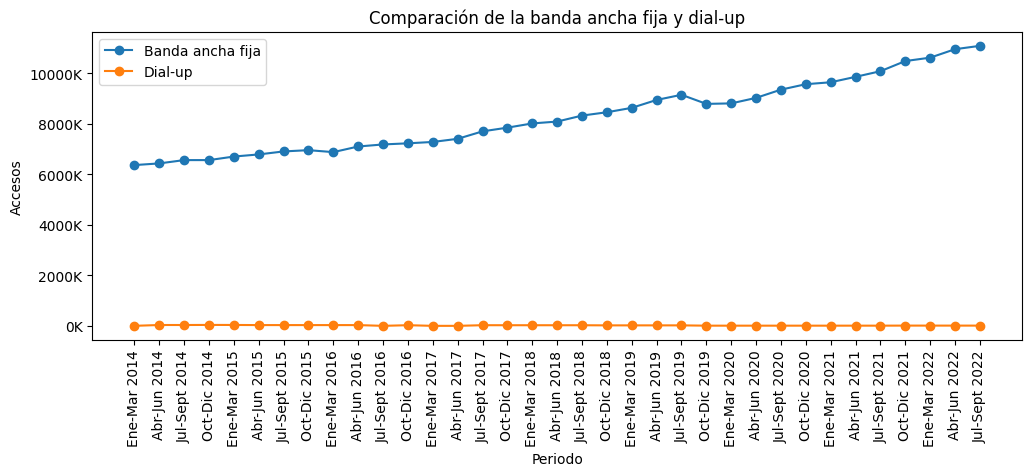

In [38]:
# Gráfico de comparación de accesos por banda ancha fija y dialup o banda angosta: Hay un claro crecimiento en las conecciones por banda ancha fija, el acceso por dialup es más o menos constante, no se observa un crecimiento significativo a lo largo del tiempo.

df_sorted = accesos_nal.sort_values(['Año', 'Trimestre'])

plt.figure(figsize=(12, 4))

# Crear las líneas para la banda ancha fija y dial-up
plt.plot(df_sorted['Periodo'], df_sorted['Banda ancha fija'], marker='o', label='Banda ancha fija')
plt.plot(df_sorted['Periodo'], df_sorted['Dial up'], marker='o', label='Dial-up')

# Ajustar las etiquetas de los ejes y con formato 1K
formatter = ticker.FuncFormatter(lambda x, _: '{:.0f}K'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

# Ajustar las etiquetas de los ejes x
plt.xticks(rotation=90)

plt.xlabel('Periodo')
plt.ylabel('Accesos')
plt.title('Comparación de la banda ancha fija y dial-up')
plt.legend()

plt.show()


# KPI:
## Porcentaje de acceso a internet por tecnologías de Banda Ancha Fija y Dial Up en Argentina.

- Porcentaje de acceso a internet por Banda Ancha Fija en Argentina: 99.72%
- Porcentaje de acceso a internet por Dial Up en Argentina: 0.24%

### El cuarto set de datos accesos a internet por banda ancha fija y angosta por provincia

In [40]:
# Cargar el 4 set de datos que contiene los datos de accesos a internet por banda ancha fija y dialup o banda angosta por provincias

acceso_prov = pd.read_csv('data/Internet_BAF_Provincias.csv')
acceso_prov.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778


In [41]:
acceso_prov['Banda ancha fija'] = acceso_prov['Banda ancha fija'].str.replace('.','').astype(int)
acceso_prov['Total'] = acceso_prov['Total'].str.replace('.','').astype(int)

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/2428245204.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acceso_prov['Banda ancha fija'] = acceso_prov['Banda ancha fija'].str.replace('.','').astype(int)
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/2428245204.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acceso_prov['Total'] = acceso_prov['Total'].str.replace('.','').astype(int)


In [42]:
acceso_prov['Dial up'] = acceso_prov['Dial up'].astype(str)
acceso_prov['Dial up'] = acceso_prov['Dial up'].str.replace('.', '')
acceso_prov['Dial up'] = acceso_prov['Dial up'].str.replace('- ', '')
acceso_prov['Dial up'] = acceso_prov['Dial up'].astype(float)
acceso_prov['Dial up'] = acceso_prov['Dial up'].fillna(0)
acceso_prov['Dial up'] = acceso_prov['Dial up'].astype(int)

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3441411118.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acceso_prov['Dial up'] = acceso_prov['Dial up'].str.replace('.', '')


In [43]:
acceso_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    int64 
 4   Dial up           840 non-null    int64 
 5   Total             840 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 39.5+ KB


In [44]:
# Total Accesos por provincia en 2022 

data_2022 = acceso_prov[acceso_prov['Año'] == 2022]
# Agrupar por provincia y trimestre
df_agrupado = data_2022.groupby('Provincia')

# Calcular la suma de los accesos por banda ancha fija
suma_conexiones = df_agrupado[['Banda ancha fija', 'Dial up']].sum()

# Mostrar los resultados
print('Total Accesos por provincia en 2022 \n', suma_conexiones)

Total Accesos por provincia en 2022 
                      Banda ancha fija  Dial up
Provincia                                     
Buenos Aires                 13925584    18691
Capital Federal               4495538     6453
Catamarca                      199676        3
Chaco                          431814       15
Chubut                         497476     2735
Corrientes                     432409       12
Córdoba                       3068696      210
Entre Ríos                     806171       66
Formosa                        190966        1
Jujuy                          350646        0
La Pampa                       336837      514
La Rioja                       257185       12
Mendoza                        841930     2340
Misiones                       532478        0
Neuquén                        473401     1407
Río Negro                      476047     1649
Salta                          605218       15
San Juan                       291132      852
San Luis              

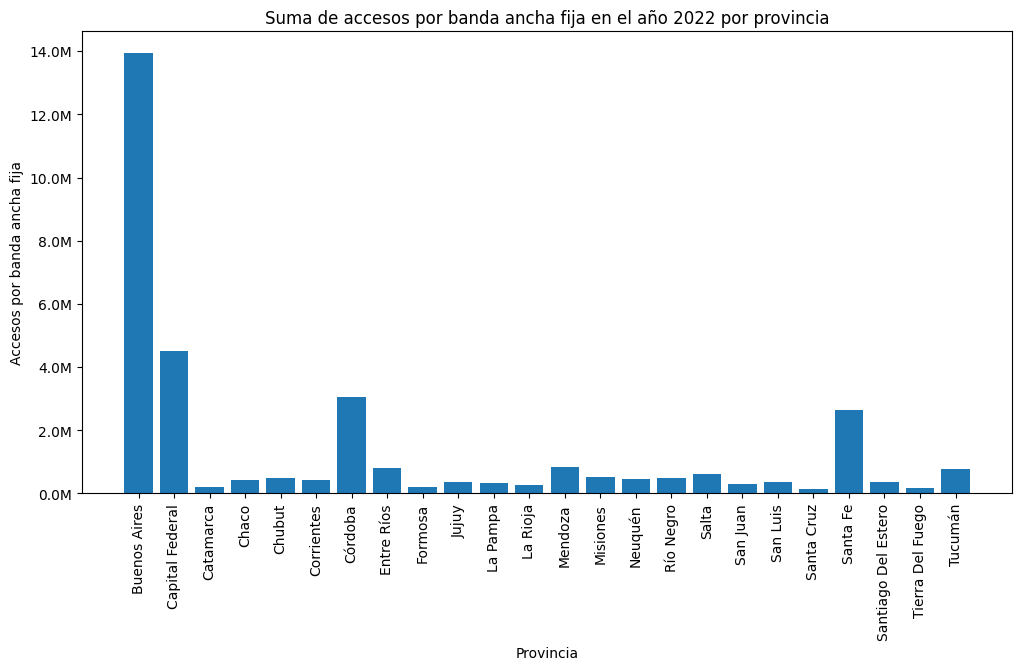

In [45]:
# Filtrar los datos para el año 2022
data_2022 = acceso_prov[acceso_prov['Año'] == 2022]

accesos_banda_ancha = data_2022.groupby('Provincia')['Banda ancha fija'].sum()

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(accesos_banda_ancha.index, accesos_banda_ancha.values)
ax.set_xlabel('Provincia')
ax.set_ylabel('Accesos por banda ancha fija')
ax.set_title('Suma de accesos por banda ancha fija en el año 2022 por provincia')
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1000000))
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=90)
plt.show()

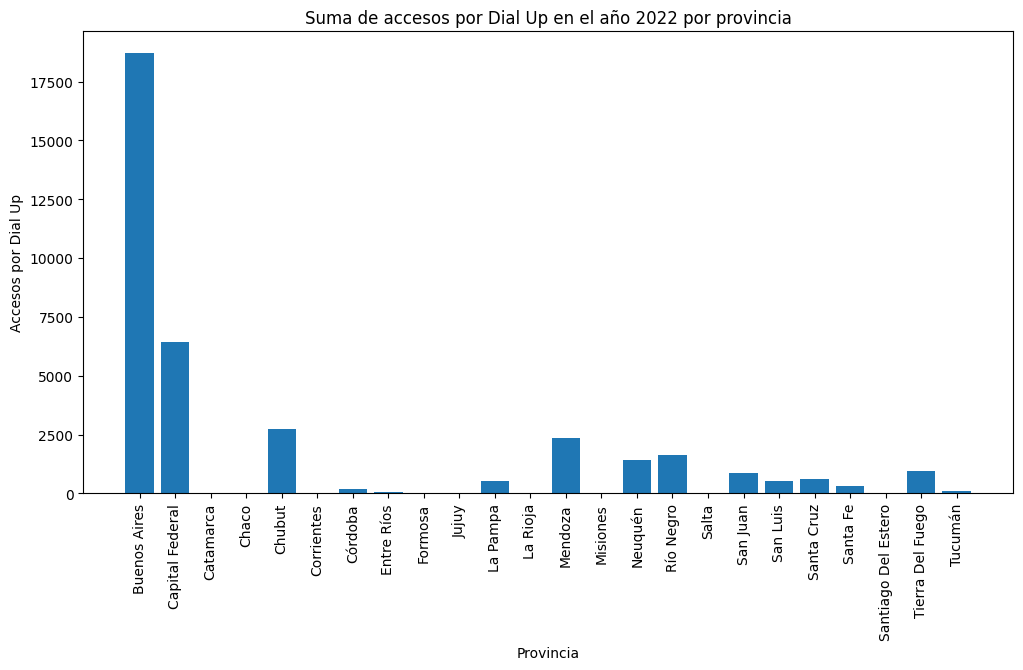

In [46]:
# Filtrar los datos para el año 2022
data_2022 = acceso_prov[acceso_prov['Año'] == 2022]

accesos_dial_up = data_2022.groupby('Provincia')['Dial up'].sum()

# Configuración del gráfico
plt.figure(figsize=(12, 6))

plt.bar(accesos_dial_up.index, accesos_dial_up.values)
plt.xlabel('Provincia')
plt.ylabel('Accesos por Dial Up')
plt.title('Suma de accesos por Dial Up en el año 2022 por provincia')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Unión de datos de penetración y acceso por provincias en el año 2022 para verificar N. de conexiones por n de accesos x cada 100 hogares 
penetracion2022 = penetracion[penetracion['Año']==2022]
acceso_prov2022 = acceso_prov[acceso_prov['Año']==2022]
data_2022 = pd.merge(penetracion2022, acceso_prov2022, on=['Año', 'Trimestre', 'Provincia'])
data_2022.head(100)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,78.11,4715469,6199,4721668
1,2022,3,Capital Federal,122.28,1545534,2145,1547679
2,2022,3,Catamarca,65.33,70292,1,70293
3,2022,3,Chaco,43.86,144141,5,144146
4,2022,3,Chubut,84.38,164874,904,165778
...,...,...,...,...,...,...,...
67,2022,1,Santa Cruz,43.34,48898,204,49102
68,2022,1,Santa Fe,77.30,870364,115,870479
69,2022,1,Santiago Del Estero,47.17,116459,2,116461
70,2022,1,Tierra Del Fuego,98.29,52298,313,52611


### Quinto set de datos - **Velocidad de Internet** 

In [48]:
# Carga 5 Set de Datos Velocidad de Internet

velocidad_nal = pd.read_csv('data/velocidad_nacional.csv')
velocidad_nal.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33.01,96.73,1.161.370,1.151.906,823.505,479.822,6.995.750,349.04,11.091.128,NaN
1,2022,2,33.67,99.50,1.193.090,1.197.030,856.562,485.321,6.741.922,351.59,10.958.684,NaN
2,2022,1,34.89,104.84,1.263.273,1.209.148,967.508,509.830,6.336.187,198.33,10.624.009,NaN
3,2021,4,41.26,28.52,1.413.208,1.245.333,976.539,558.358,6.032.322,194.25,10.489.794,NaN
4,2021,3,40.17,41.44,2.550.229,1.095.772,710.122,536.364,4.948.174,163.27,10.085.541,NaN


In [49]:
velocidad_nal.drop(columns='Unnamed: 11', inplace=True)

In [50]:
velocidad_nal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.1+ KB


In [51]:
velocidad_nal['Hasta 512 kbps'] = velocidad_nal['Hasta 512 kbps'].astype(int) 
velocidad_nal['Entre 512 Kbps y 1 Mbps'] = velocidad_nal['Entre 512 Kbps y 1 Mbps'].astype(int) 

In [52]:
#Función para eliminar puntos y convertir a int
def eliminar_puntos(df):
    # Recorrer cada columna del DataFrame
    for col in df.columns:
        # Verificar si el tipo de datos es string
        if df[col].dtype == 'object':
            # Reemplazar los puntos por una cadena vacía
            df[col] = df[col].str.replace('.', '')
            df[col] = df[col].str.replace('*', '')
            # Convertir los valores a tipo entero
            try:
                df[col] = df[col].astype(float)
            except ValueError:
                continue
    return df

In [53]:
eliminar_puntos(velocidad_nal)

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('*', '')


,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33,96,1161370.00,1151906.00,823505.00,479822.00,6995750.00,349.04,11091128.00
1,2022,2,33,99,1193090.00,1197030.00,856562.00,485321.00,6741922.00,351.59,10958684.00
2,2022,1,34,104,1263273.00,1209148.00,967508.00,509830.00,6336187.00,198.33,10624009.00
3,2021,4,41,28,1413208.00,1245333.00,976539.00,558358.00,6032322.00,194.25,10489794.00
4,2021,3,40,41,2550229.00,1095772.00,710122.00,536364.00,4948174.00,163.27,10085541.00
5,2021,2,40,42,2531271.00,1080279.00,693277.00,647401.00,4661291.00,167.37,9863084.00
6,2021,1,39,41,2593477.00,1072722.00,737930.00,595920.00,4379965.00,186.80,9647972.00
7,2020,4,39,42,2622638.00,1073875.00,786595.00,582420.00,4239237.00,185.10,9571562.00
8,2020,3,41,44,2637984.00,1040017.00,799350.00,538567.00,4053461.00,201.78,9356199.00
9,2020,2,41,48,2651502.00,1053107.00,807775.00,523437.00,3711499.00,194.01,9031056.00


In [54]:
velocidad_nal.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33,96,1161370.00,1151906.00,823505.00,479822.00,6995750.00,349.04,11091128.00
1,2022,2,33,99,1193090.00,1197030.00,856562.00,485321.00,6741922.00,351.59,10958684.00
2,2022,1,34,104,1263273.00,1209148.00,967508.00,509830.00,6336187.00,198.33,10624009.00
3,2021,4,41,28,1413208.00,1245333.00,976539.00,558358.00,6032322.00,194.25,10489794.00
4,2021,3,40,41,2550229.00,1095772.00,710122.00,536364.00,4948174.00,163.27,10085541.00


In [55]:
velocidad_nal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     int64  
 3   Entre 512 Kbps y 1 Mbps  35 non-null     int64  
 4   Entre 1 Mbps y 6 Mbps    35 non-null     float64
 5   Entre 6 Mbps y 10 Mbps   35 non-null     float64
 6   Entre 10 Mbps y 20 Mbps  35 non-null     float64
 7   Entre 20 Mbps y 30 Mbps  35 non-null     float64
 8   Más de 30 Mbps           35 non-null     float64
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     float64
dtypes: float64(7), int64(4)
memory usage: 3.1 KB


In [56]:
velocidad_nal.columns

Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total'],
      dtype='object')

In [57]:
# Velocidad Nacional en el último año

vel2022 = velocidad_nal[velocidad_nal['Año']== 2022]
vel2022 = vel2022.groupby('Año')[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total']].sum()
vel2022

,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
Año,,,,,,,,,
2022,100,299,3617733.00,3558084.00,2647575.00,1474973.00,20073859.00,898.96,32673821.00


In [58]:

vel = velocidad_nal.groupby('Año')[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total']].sum()
vel

,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
Año,,,,,,,,,
2014,174,2505,20517861.00,1500494.00,707137.00,5701.00,51507.00,0.00,25464747.00
2015,150,1898,20397296.00,2644987.00,1959289.00,48357.00,77723.00,0.00,27179071.00
2016,114,1315,19492259.00,3467624.00,3384642.00,395727.00,122012.00,0.00,28294370.00
2017,76,890,16835984.00,4033663.00,5794644.00,1427698.00,729974.00,155.15,29946586.00
2018,155,855,13328851.00,3698173.00,7053697.00,5122486.00,1966724.00,783.90,32968187.00
2019,647,398,12974661.00,3826965.00,4292465.00,4640209.00,7962202.00,819.07,35566181.00
2020,163,190,10561943.00,4189013.00,3208190.00,2176733.00,15505079.00,775.10,36771243.00
2021,160,152,9088185.00,4494106.00,3117868.00,2338043.00,20021752.00,711.69,40086391.00
2022,100,299,3617733.00,3558084.00,2647575.00,1474973.00,20073859.00,898.96,32673821.00


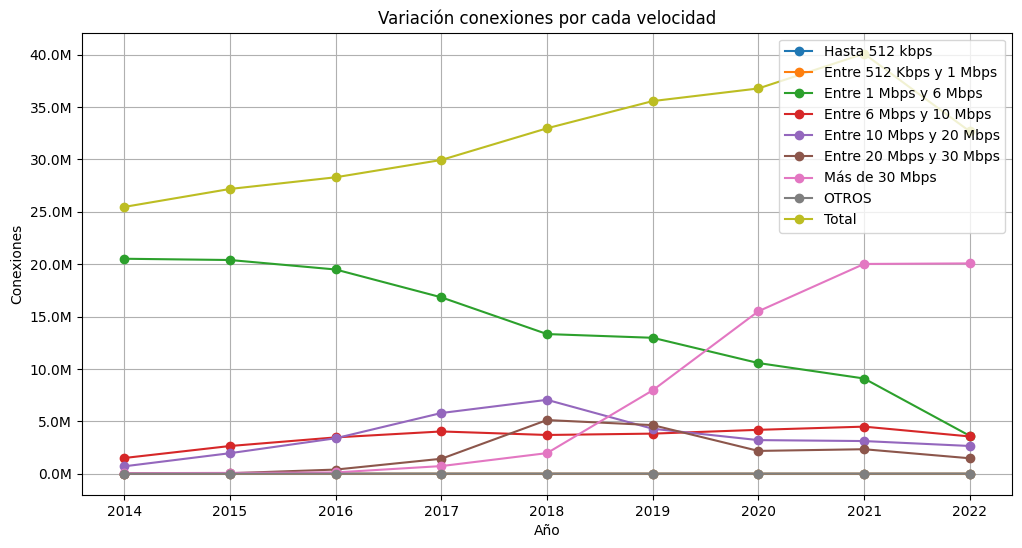

In [59]:

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Iterar sobre las columnas de velocidad
for columna in vel.columns:
    plt.plot(vel.index, vel[columna], marker='o', label=columna)

plt.xlabel('Año')
plt.ylabel('Conexiones')
plt.title('Variación conexiones por cada velocidad')
plt.legend()
plt.grid(True)

# Formatear el eje
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar el gráfico
plt.show()

# KPI:
## El crecimiento en conexiones se da en la velocidad de Más de 30 Mbps en los últimos años, por lo que debe tenerse en cuenta a la hora de  generar una estrategia de penetración del mercado para la oferta del servicio de internet fijo por banda ancha

# El Set de Datos 6 **Velocidad de bajada por provincia**

In [60]:
# Cargar el 6 set de datos velocidad de bajada por provincia

velocidad_prov = pd.read_csv('data/velocidad_provincia.csv')
velocidad_prov.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.98,27.71,290.315,297.92,267.04,124.19,3.618.689,65.82,4.721.668
1,2022,3,Capital Federal,517.00,5.74,34.371,67.83,51.95,28.69,1.253.105,105.48,1.547.679
2,2022,3,Catamarca,71.00,384.00,3.107,5.39,5.10,3.74,50.298,2.21,70.293
3,2022,3,Chaco,461.00,987.00,16.782,18.94,8.05,15.83,79.390,3.71,144.146
4,2022,3,Chubut,109.00,1.44,45.707,30.94,34.68,15.31,17.563,20.02,165.778


In [61]:
velocidad_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [62]:
eliminar_puntos(velocidad_prov)

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('*', '')


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.98,27.71,290315.00,297.92,267.04,124.19,3618689.00,65.82,4721668.00
1,2022,3,Capital Federal,517.00,5.74,34371.00,67.83,51.95,28.69,1253105.00,105.48,1547679.00
2,2022,3,Catamarca,71.00,384.00,3107.00,5.39,5.10,3.74,50298.00,2.21,70293.00
3,2022,3,Chaco,461.00,987.00,16782.00,18.94,8.05,15.83,79390.00,3.71,144146.00
4,2022,3,Chubut,109.00,1.44,45707.00,30.94,34.68,15.31,17563.00,20.02,165778.00
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,161.00,1.62,24972.00,1.00,1.00,0.00,0.00,0.00,26760.00
836,2014,1,Santa Fe,8.46,124.47,345225.00,20.33,6.84,23.00,668.00,0.00,506013.00
837,2014,1,Santiago Del Estero,1.23,10.53,22817.00,2.42,109.00,0.00,0.00,0.00,37113.00
838,2014,1,Tierra Del Fuego,12.00,607.00,30902.00,6.00,0.00,0.00,0.00,0.00,31527.00


In [63]:
velocidad_prov.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

In [64]:
vel_prov = velocidad_prov.groupby(['Año', 'Provincia'])[['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']].sum()
vel_prov = vel_prov.reset_index()

In [65]:
vel_prov

,Año,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2014,Buenos Aires,30.95,594.64,9100616.00,622.33,268.74,1730.00,17984.00,0.00,10636993.00
1,2014,Capital Federal,2541.70,311.17,4272677.00,383.27,261.48,1099.00,27258.00,0.00,5262192.00
2,2014,Catamarca,78.00,34.88,55007.00,8.41,707.00,0.00,1.00,0.00,99088.00
3,2014,Chaco,1731.00,58.27,166439.00,23.40,745.96,139.00,2.00,0.00,255680.00
4,2014,Chubut,13.39,29.08,244360.00,104.00,0.00,0.00,0.00,0.00,276942.00
...,...,...,...,...,...,...,...,...,...,...,...
211,2022,Santa Cruz,155.00,20.58,37400.00,34.18,35.54,7.42,10747.00,1776.00,147797.00
212,2022,Santa Fe,1404.00,35.32,415039.00,611.33,229.82,173.59,1114410.00,56.24,2637148.00
213,2022,Santiago Del Estero,534.00,4.19,88158.00,180.08,44.23,2642.00,31323.00,2376.00,353537.00
214,2022,Tierra Del Fuego,68.00,2556.00,36903.00,45.28,58.10,5.23,3009.00,9.12,160277.00


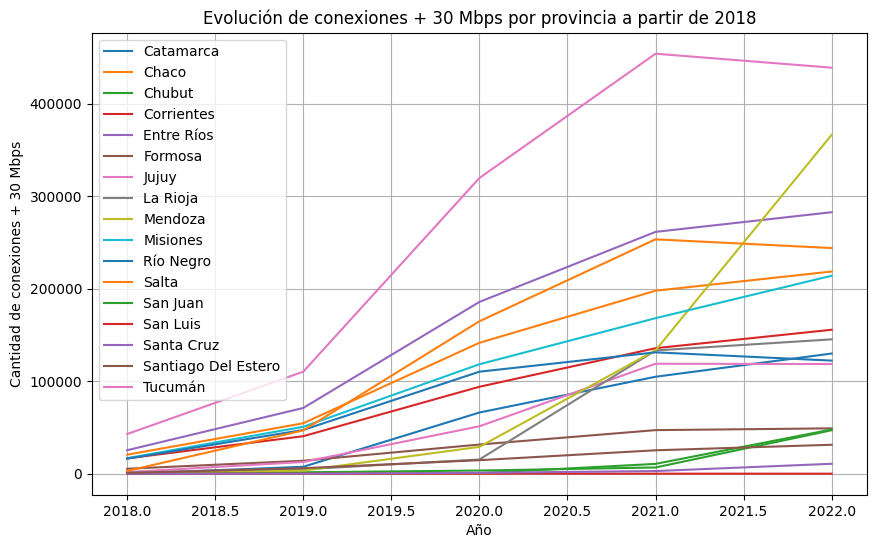

In [66]:
# Filtrar los datos a partir de 2018
vel_prov_filtrado = vel_prov[vel_prov['Año'] >= 2018]

# Obtener las provincias a mostrar
provincias = ['Catamarca', 'Chaco', 'Chubut', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza', 'Misiones', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santiago Del Estero', 'Tucumán']

# Crear un gráfico de área apilada
plt.figure(figsize=(10, 6))

# Iterar sobre las provincias y agregar el área correspondiente
for provincia in provincias:
    datos_provincia = vel_prov_filtrado[vel_prov_filtrado['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['+ 30 Mbps'], label=provincia)

plt.xlabel('Año')
plt.ylabel('Cantidad de conexiones + 30 Mbps')
plt.title('Evolución de conexiones + 30 Mbps por provincia a partir de 2018')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [67]:
# Accesos por velocidad de bajada en el año 2022 teniendo en cuenta las 17 Provincias con menor penetración de internet en Argentina
vel_prov_2022 = velocidad_prov[(velocidad_prov['Año'] == 2022) & velocidad_prov['Provincia'].isin(['Catamarca', 'Chaco', 'Chubut', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza', 'Misiones', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santiago Del Estero', 'Tucumán'])]
vel_prov = vel_prov_2022.groupby(['Año', 'Provincia'])[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']].sum()
vel_prov

HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
Año  Provincia                                                  
2022 Catamarca                    213.00              1253.00   
     Chaco                       1383.00               989.15   
     Chubut                       331.00                 4.56   
     Corrientes                   201.00                11.83   
     Entre Ríos                   321.00                16.95   
     Formosa                      291.00              1162.00   
     Jujuy                        174.00                 5.47   
     La Rioja                      54.00              2195.00   
     Mendoza                      320.00                 9.26   
     Misiones                     153.00                11.43   
     Río Negro                    338.00                 3.83   
     Salta                        342.00                 4.75   
     San Juan                      74.00                 6.32   
     San Luis                     181.00              1256.00   
     Santa Cruz                   155.00                20.58   
     Santiago Del Estero          534.00                 4.19   
     Tucumán                      117.00                 6.45   

                          + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
Año  Provincia                                                    
2022 Catamarca                     11171.00               18.55   
     Chaco                         51273.00               60.28   
     Chubut                       152880.00               94.01   
     Corrientes                    72243.00               74.45   
     Entre Ríos                   145922.00              145.03   
     Formosa                       71485.00               46.20   
     Jujuy                         60734.00               47.37   
     La Rioja                       9597.00               11.96   
     Mendoza                      140423.00               70.94   
     Misiones                     109537.00               64.73   
     Río Negro                    101865.00               54.66   
     Salta                        102231.00              212.11   
     San Juan                      93065.00               34.44   
     San Luis                      21690.00               45.87   
     Santa Cruz                    37400.00               34.18   
     Santiago Del Estero           88158.00              180.08   
     Tucumán                      103060.00              129.49   

                          + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  \
Año  Provincia                                                                  
2022 Catamarca                          21.04                10.89  129939.00   
     Chaco                              37.34                44.81  218607.00   
     Chubut                            102.05                43.71   47012.00   
     Corrientes                         42.85                53.88  155652.00   
     Entre Ríos                         79.07                85.95  282721.00   
     Formosa                            19.14              1871.00   49058.00   
     Jujuy                             111.79              1644.00  118573.00   
     La Rioja                           71.66                16.46  145280.00   
     Mendoza                           186.52                58.35  366457.00   
     Misiones                           52.30                55.23  214047.00   
     Río Negro                          82.03                41.49  122297.00   
     Salta                              17.99                 4.37  243977.00   
     San Juan                           71.95                12.60   47838.00   
     San Luis                           32.91               203.49      39.00   
     Santa Cruz                         35.54                 7.42   10747.00   
     Santiago Del Estero                44.23              2642.00   31323.00   
     Tucumán                            69.86             

# Set de datos 7 **Tecnologías para el acceso a intenet fijo por provincia**

In [68]:
tecnologias_nal = pd.read_csv('data/Internet_Accesos-por-tecnologia nal.csv')
tecnologias_nal.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.11,235.23,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.24,231.61,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.81,252.00,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.11,252.60,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.42,250.19,10.085.541,Jul-Sept 2021


In [69]:
eliminar_puntos(tecnologias_nal)

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('*', '')


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277.00,6031970.00,2871541.00,557.11,235.23,11091128.00,Jul-Sept 2022
1,2022,2,1468333.00,5979214.00,2723285.00,556.24,231.61,10958684.00,Abr-Jun 2022
2,2022,1,1533240.00,6073426.00,2219533.00,545.81,252.00,10624009.00,Ene-Mar 2022
3,2021,4,1657615.00,5984240.00,2072236.00,523.11,252.60,10489794.00,Oct-Dic 2021
4,2021,3,1950631.00,5826257.00,1566048.00,492.42,250.19,10085541.00,Jul-Sept 2021
5,2021,2,2018587.00,5641731.00,1472246.00,476.97,253.55,9863084.00,Abr-Jun 2021
6,2021,1,2175211.00,5424782.00,1362976.00,434.55,250.46,9647972.00,Ene-Mar 2021
7,2020,4,2213949.00,5371824.00,1311199.00,421.55,253.04,9571562.00,Oct-Dic 2020
8,2020,3,2263889.00,5259351.00,1170879.00,413.26,248.82,9356199.00,Jul-Sept 2020
9,2020,2,2295533.00,5005115.00,1106725.00,376.67,247.02,9031056.00,Abr-Jun 2020


In [70]:
tecnologias_nal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     float64
 3   Cablemodem    35 non-null     float64
 4   Fibra óptica  35 non-null     float64
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     float64
 8   Periodo       35 non-null     object 
dtypes: float64(6), int64(2), object(1)
memory usage: 2.6+ KB


In [71]:
tecnologias_nal.columns

Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')

In [72]:
tecnologias_anio = tecnologias_nal.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total']].sum()
tecnologias_anio

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
Año,,,,,,
2014,14884750.00,9975087.00,604862.00,305.23,286.70,26056633.00
2015,15115694.00,11162971.00,620877.00,331.43,242.85,27473819.00
2016,15073814.00,12177088.00,680127.00,337.40,227.63,28496058.00
2017,14639302.00,14148063.00,766312.00,432.84,344.16,30330683.00
2018,13981984.00,16571272.00,1079124.00,870.05,465.76,32968187.00
2019,11447626.00,18754974.00,3191409.00,1262.83,909.34,35566181.00
2020,9072828.00,20539964.00,4636620.00,1563.81,958.02,36771243.00
2021,7802044.00,22877010.00,6473506.00,1927.04,1006.79,40086391.00
2022,4396850.00,18084610.00,7814359.00,1659.17,718.84,32673821.00


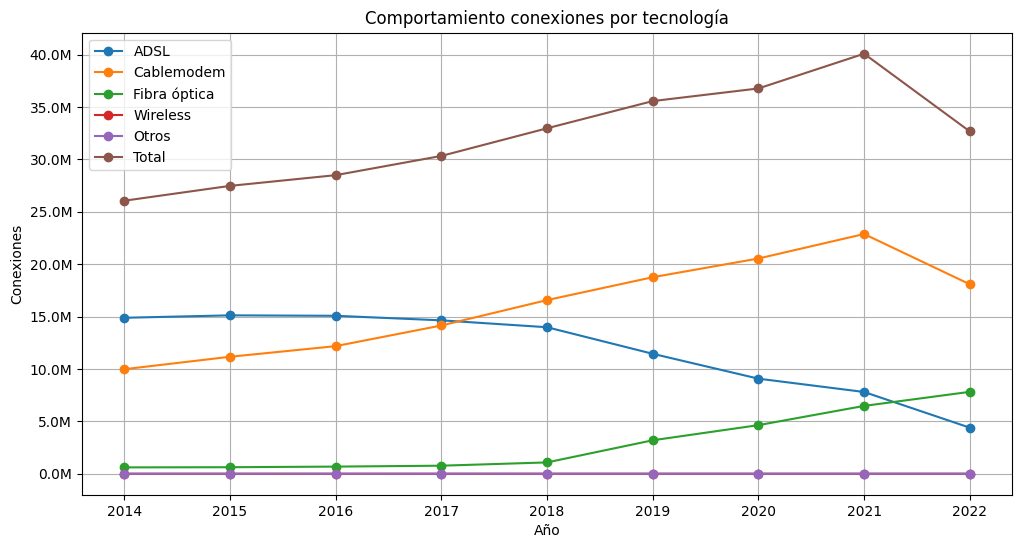

In [73]:

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Iterar sobre las columnas de velocidad
for columna in tecnologias_anio.columns:
    plt.plot(tecnologias_anio.index, tecnologias_anio[columna], marker='o', label=columna)

plt.xlabel('Año')
plt.ylabel('Conexiones')
plt.title('Comportamiento conexiones por tecnología')
plt.legend()
plt.grid(True)

# Formatear el eje
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar el gráfico
plt.show()

De la mano del crecimiento de la velocidad de internet superior a 30Mbps, la tecnología de conexión de mayor uso a nivel nacional son el Cablemodem y la Fibra óptica.

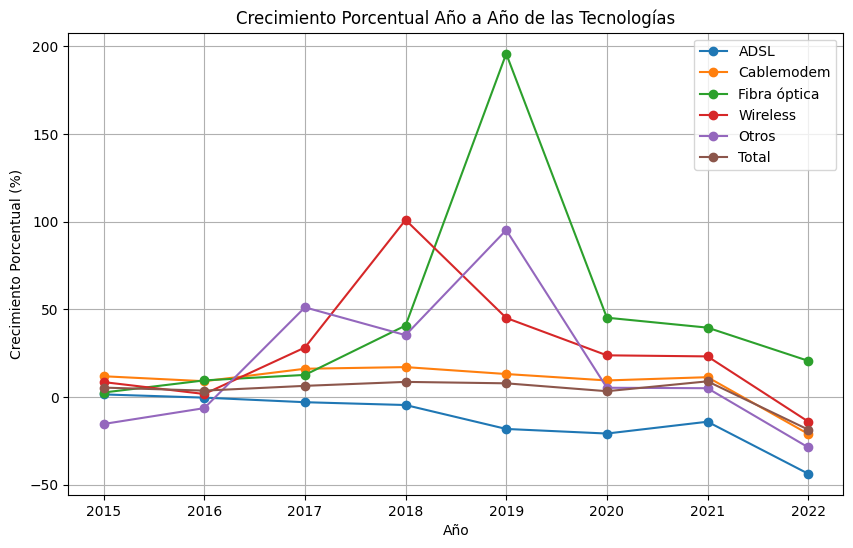

In [74]:
# Calcular el crecimiento porcentual año a año
crecimiento = tecnologias_anio.pct_change() * 100

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre las columnas de crecimiento y graficar
for columna in crecimiento.columns:
    plt.plot(crecimiento.index, crecimiento[columna], marker='o', label=columna)

plt.xlabel('Año')
plt.ylabel('Crecimiento Porcentual (%)')
plt.title('Crecimiento Porcentual Año a Año de las Tecnologías')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# KPI:
## La conectividad por fibra óptica viene reemplazando año a año a las demás tecnologías. Mientras que entre los años 2018 y 2019 la fibra óptica creció cerca de un 200% las tecnologías que ofrecen menor velocidad cayeron. Entre el año 2021 y 2022 hubo desconexiones por cablemodem del -30% aproximadamente, las conexiones de fibra óptica crecieron en esa misma medida.

# Set de datos 8 **Tecnologías para el acceso a intenet fijo por provincia**

In [76]:
tecnologias_prov = pd.read_csv('data/Internet_Accesos-por-tecnologia.csv')
tecnologias_prov.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
836,2014,1,Santa Fe,322.662,174.296,3.059,5.95,644.00,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.00,34.00,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.00,2.93,28.038
839,2014,1,Tucumán,129.717,83,121,13.00,98.00,130.032
840,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
tecnologias_prov.drop(840, inplace=True)

In [78]:
eliminar_puntos(tecnologias_prov) #OJO A LA NOTA: Datos provinciales no coinciden a nivel nacional

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('*', '')


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022.00,3.00,Buenos Aires,339648.00,2748325.00,1436433.00,126.85,70.42,4721668.00
1,2022.00,3.00,Capital Federal,140791.00,1240125.00,129218.00,5.76,31.79,1547679.00
2,2022.00,3.00,Catamarca,10010.00,10495.00,46224.00,1.33,2.23,70293.00
3,2022.00,3.00,Chaco,27164.00,61800.00,44645.00,8.18,2.36,144146.00
4,2022.00,3.00,Chubut,45377.00,72212.00,9574.00,29.78,8.83,165778.00
...,...,...,...,...,...,...,...,...,...
835,2014.00,1.00,Santa Cruz,18927.00,100.00,381.00,4.09,3.26,26764.00
836,2014.00,1.00,Santa Fe,322662.00,174296.00,3059.00,5.95,644.00,506612.00
837,2014.00,1.00,Santiago Del Estero,32567.00,3598.00,19.00,915.00,34.00,37133.00
838,2014.00,1.00,Tierra Del Fuego,21618.00,2837.00,648.00,1.00,2.93,28038.00


In [79]:
tecnologias_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           840 non-null    float64
 1   Trimestre     840 non-null    float64
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    float64
 4   Cablemodem    840 non-null    float64
 5   Fibra óptica  840 non-null    float64
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    float64
dtypes: float64(8), object(1)
memory usage: 59.2+ KB


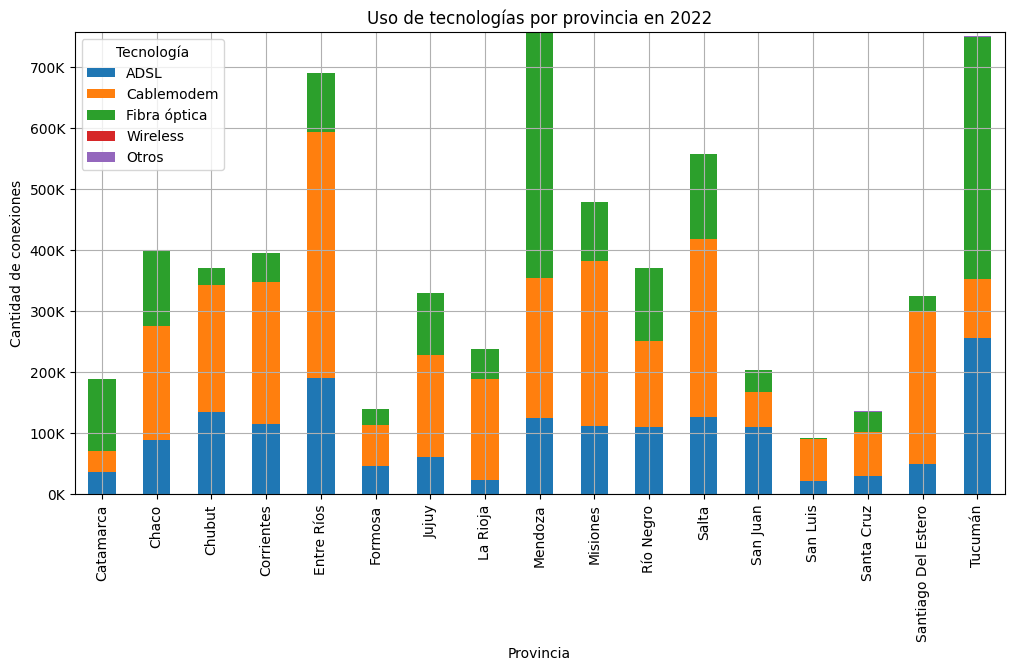

In [80]:
# Filtrar los datos a partir del año 2022
tecnologias_filtradas = tecnologias_prov[(tecnologias_prov['Año'] == 2022) & tecnologias_prov['Provincia'].isin(['Catamarca', 'Chaco', 'Chubut', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza', 'Misiones', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santiago Del Estero', 'Tucumán'])]

# Agrupar los datos por provincia y calcular la suma de las tecnologías
tecnologias_por_provincia = tecnologias_filtradas.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Configurar el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 6))

tecnologias_por_provincia.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.title('Uso de tecnologías por provincia en 2022')

plt.legend(title='Tecnología')
plt.grid(True)

# Formatear los valores en el eje y en formato de millones
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1e3):,}K')
ax.yaxis.set_major_formatter(formatter)

plt.show()


Analiazando el uso de tecnologías para conexión a internet en las 17 provincias con menor penetración, encontramos que el Cablemodem y la fibra óptica son las principales. **Aquí está la disparidad anunciada frente a que los datos no coinciden a nivel nacional y local, en lo referente a que a nivel nacional la tecnología más usada es el cablemodem y en los resultados por provincias arroja que es la fibra óptica. Si se observa el gráfico de conexiones con velocidad de +de30Mbps frente a las conexiones por técnologías usadas, no hay correspondencia entre la información de varias provincias**

# KPI:
## Teniendo en cuenta la tendencia Nacional, para que la empresa pueda ingresar de manera exitosa en el mercado del internet fijo por banda ancha, debe revisar la posibilidad de hacer inversiones en infraestructura de fibra óptica de tal manera que pueda ofrecer la tecnología de punta que ofrece la velocidad de internet preferida en los últimos años.

## Set de Datos 9: **Ingresos por la prestación del servicio**

In [81]:
# Carga el 10 Set de Datos

ingresos = pd.read_csv('data/Internet_Ingresos.csv')
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [82]:
eliminar_puntos(ingresos)

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('*', '')


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67055930.00,Jul-Sept 2022
1,2022,2,60335724.00,Abr-Jun 2022
2,2022,1,55589997.00,Ene-Mar 2022
3,2021,4,45467887.00,Oct-Dic 2021
4,2021,3,42999944.00,Jul-Sept 2021
5,2021,2,38239667.00,Abr-Jun 2021
6,2021,1,36676371.00,Ene-Mar 2021
7,2020,4,33539703.00,Oct-Dic 2020
8,2020,3,31997445.00,Jul-Sept 2020
9,2020,2,32102476.00,Abr-Jun 2020


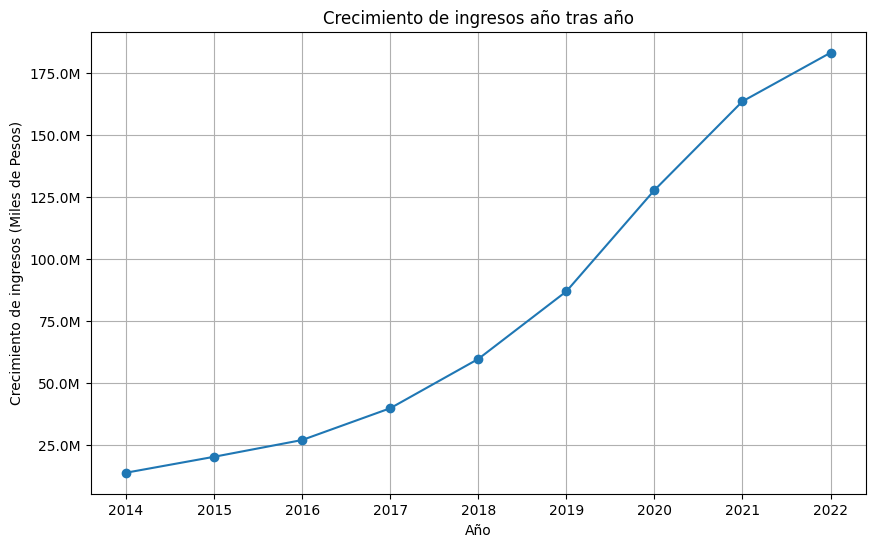

In [83]:
import matplotlib.ticker as mticker

# Agrupar por año y calcular la suma de ingresos
df_grouped = ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

# Calcular el crecimiento de ingresos año tras año
df_grouped['Crecimiento'] = df_grouped['Ingresos (miles de pesos)']

# Graficar el crecimiento de ingresos año tras año
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_grouped['Año'], df_grouped['Crecimiento'], marker='o')
ax.set_xlabel('Año')
ax.set_ylabel('Crecimiento de ingresos (Miles de Pesos)')
ax.set_title('Crecimiento de ingresos año tras año')
ax.set_xticks(df_grouped['Año'])
ax.grid(True)

# Formatear el eje y en formato de 1,4M
formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

plt.show()

Los ingresos por la prestación del servicio tienen una clara tendencia de crecimiento a través de los años. Sin embargo es importante verificar el porcentaje de crecimiento de cada año y compararlo historicamente. 

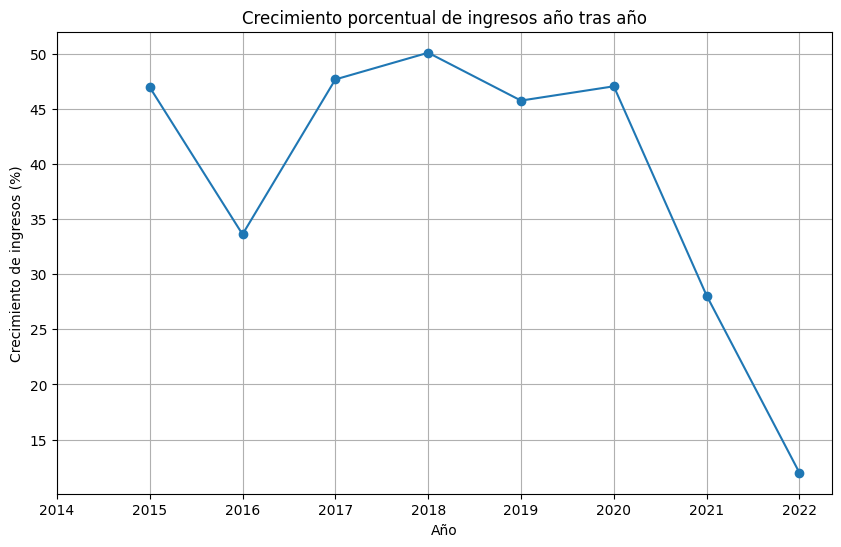

In [84]:
# Agrupar por año y calcular la suma de ingresos
df_grouped = ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

# Calcular el crecimiento de ingresos año tras año
df_grouped['Crecimiento'] = df_grouped['Ingresos (miles de pesos)'].pct_change() * 100

# Graficar el crecimiento de ingresos año tras año
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Año'], df_grouped['Crecimiento'], marker='o')
plt.xlabel('Año')
plt.ylabel('Crecimiento de ingresos (%)')
plt.title('Crecimiento porcentual de ingresos año tras año')
plt.xticks(df_grouped['Año'])
plt.grid(True)
plt.show()

# KPI:
## Entre 2027 y 2020 los ingresos por la prestación del servicio crecieron por encima del 45% cada año. Posteriormente en el año 2021 estuvo cerca al 30% y en 2022 en torno al 12%. A medida que crece la penetración del servicio de internet fijo en Argentina, el crecimiento en términos porcentuales del ingreso año a año será menor, aspecto que también puede ser influido por la elevada inflación en el país en los últimos años.

In [85]:
poranio = ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum()
poranio

Año
2014    13683949.00
2015    20108814.00
2016    26867508.00
2017    39671973.00
2018    59539594.00
2019    86772531.00
2020   127585840.00
2021   163383869.00
2022   182981651.00
Name: Ingresos (miles de pesos), dtype: float64

# Set de Datos 10 **Censo Hogares 2022**
Fuente: Instituto Nacional de Estadística y Censos República Argentina [https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-165](https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-165)

* Se aclara que se toman los datos del total de viviendas particulares, no se incluyen las viviendas colectivas reportadas en el censo

In [86]:
hogares = pd.read_csv('data/censohogares2022.csv', sep=';')
hogares.head()

,Provincia,Total de viviendas particulares,Total de población
0,Capital Federal,1.638.764,3.120.612
1,Buenos Aires,6.695.273,17.569.053
2,Catamarca,158.989,429.556
3,Chaco,401.658,1.142.963
4,Chubut,236.010,603.120


In [87]:
eliminar_puntos(hogares)

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_3199/3828937446.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('*', '')


,Provincia,Total de viviendas particulares,Total de población
0,Capital Federal,1638764.00,3120612.00
1,Buenos Aires,6695273.00,17569053.00
2,Catamarca,158989.00,429556.00
3,Chaco,401658.00,1142963.00
4,Chubut,236010.00,603120.00
5,Córdoba,1630356.00,3978984.00
6,Corrientes,406480.00,1197553.00
7,Entre Ríos,559398.00,1426426.00
8,Formosa,212941.00,606041.00
9,Jujuy,276222.00,797955.00


In [88]:
sum2022 = penetracion2022.groupby('Provincia')['Accesos por cada 100 hogares'].mean()
sum2022 = sum2022.reset_index()
sum2022

,Provincia,Accesos por cada 100 hogares
0,Buenos Aires,77.26
1,Capital Federal,118.46
2,Catamarca,61.98
3,Chaco,43.90
4,Chubut,85.21
5,Corrientes,48.07
6,Córdoba,87.18
7,Entre Ríos,63.76
8,Formosa,40.71
9,Jujuy,58.10


In [89]:
# Crea un df uniendo la penetración de internet por provincias en 2022 con el dato del censo 2022
df = pd.merge(sum2022, hogares, on='Provincia')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provincia                        24 non-null     object 
 1   Accesos por cada 100 hogares     24 non-null     float64
 2   Total de viviendas particulares  24 non-null     float64
 3   Total de población               24 non-null     float64
dtypes: float64(3), object(1)
memory usage: 960.0+ bytes


In [91]:
df

,Provincia,Accesos por cada 100 hogares,Total de viviendas particulares,Total de población
0,Buenos Aires,77.26,6695273.00,17569053.00
1,Capital Federal,118.46,1638764.00,3120612.00
2,Catamarca,61.98,158989.00,429556.00
3,Chaco,43.90,401658.00,1142963.00
4,Chubut,85.21,236010.00,603120.00
5,Corrientes,48.07,406480.00,1197553.00
6,Córdoba,87.18,1630356.00,3978984.00
7,Entre Ríos,63.76,559398.00,1426426.00
8,Formosa,40.71,212941.00,606041.00
9,Jujuy,58.10,276222.00,797955.00


In [92]:
# Convertir Accesos por cada 100 hogares a porcentaje
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'] / 100

In [93]:
# Calcular las viviendas que faltan por acceso a internet

df['Viviendas con internet'] = df['Total de viviendas particulares'] * df['Accesos por cada 100 hogares']
df['Viviendas sin internet'] = df['Total de viviendas particulares'] - df['Viviendas con internet']
df['% viviendas sin internet'] = df['Viviendas sin internet'] / df['Total de viviendas particulares']

In [94]:
df

,Provincia,Accesos por cada 100 hogares,Total de viviendas particulares,Total de población,Viviendas con internet,Viviendas sin internet,% viviendas sin internet
0,Buenos Aires,0.77,6695273.00,17569053.00,5172544.74,1522728.26,0.23
1,Capital Federal,1.18,1638764.00,3120612.00,1941334.46,-302570.46,-0.18
2,Catamarca,0.62,158989.00,429556.00,98541.38,60447.62,0.38
3,Chaco,0.44,401658.00,1142963.00,176341.25,225316.75,0.56
4,Chubut,0.85,236010.00,603120.00,201096.25,34913.75,0.15
5,Corrientes,0.48,406480.00,1197553.00,195381.39,211098.61,0.52
6,Córdoba,0.87,1630356.00,3978984.00,1421398.71,208957.29,0.13
7,Entre Ríos,0.64,559398.00,1426426.00,356653.52,202744.48,0.36
8,Formosa,0.41,212941.00,606041.00,86695.38,126245.62,0.59
9,Jujuy,0.58,276222.00,797955.00,160475.77,115746.23,0.42


In [95]:
# La Provincia de Buenos Aires concentra el 38% de los hogares en Argentina
BsAs = df[df['Provincia'] == 'Buenos Aires']
BsAs['Total de viviendas particulares'] / df['Total de viviendas particulares'].sum()

0   0.38
Name: Total de viviendas particulares, dtype: float64

In [96]:
# Del total de viviendas sin internet en Argentina, el 35% se concentra en la provincia de Buenos Aires
BsAs['Viviendas sin internet'] / df['Viviendas sin internet'].drop(1).sum()

0   0.33
Name: Viviendas sin internet, dtype: float64

In [97]:

# Obtener el total de viviendas particulares en Argentina
df['Total de viviendas particulares'].sum()

17780210.0

In [98]:
# Obtener el total de viviendas sin internet, se excluye Capital Federal por tener valores superiores al 100% de cobertura
df['Viviendas sin internet'].drop(1).sum()

4677265.804833334

In [99]:
# Porcentaje de viviendas sin internet en Argentina
df['Viviendas sin internet'].drop(1).sum() / df['Total de viviendas particulares'].sum()

0.263060211596676

In [100]:
# Obtener el total de viviendas sin internet, Excluyendo a Buenos Aires y Capital Federal
df['Viviendas sin internet'].drop([0, 1]).sum()

3154537.548866667

In [101]:
# Porcentaje de viviendas sin internet en Argentina Excluyendo a Buenos Aires y Capital Federal
df['Viviendas sin internet'].drop([0, 1]).sum() / df['Total de viviendas particulares'].sum()

0.17741846406013578

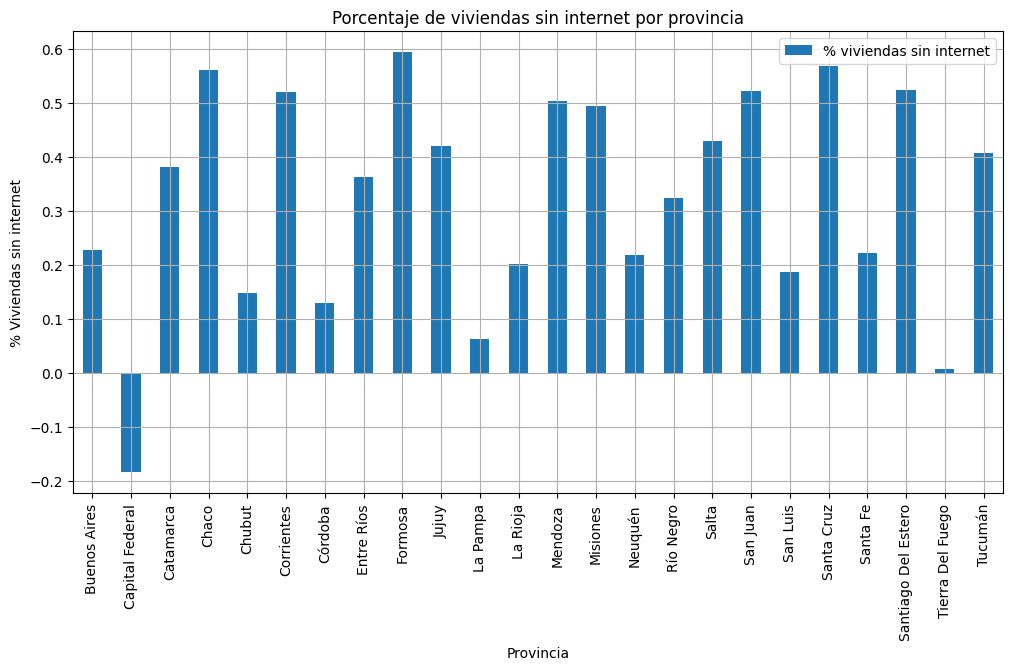

In [102]:
# Filtrar las columnas necesarias
df_porcentaje = df[['Provincia', '% viviendas sin internet']]

# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
df_porcentaje.plot(x='Provincia', y='% viviendas sin internet', kind='bar', ax=ax)

plt.xlabel('Provincia')
plt.ylabel('% Viviendas sin internet')
plt.title('Porcentaje de viviendas sin internet por provincia')

plt.grid(True)

# Mostrar el gráfico
plt.show()

Encontramos en este gráfico las provincias con su respectivo porcentaje de viviendas sin internet. Si bien la Provincia de Buenos Aires tiene un porcentaje que podría considerarse bajo respecto de la media, es en donde se concentran más hogares concentrados, por lo que representa una importante cuota de mercado. Por otra parte, se desestima a priori la entrada a Capital Federal, La Pampa y Tierra Del Fuego. 

# KPI:
## En el año 2022 hay 4.677.266 viviendas sin internet, correspondiente al 26% del total. Solo en la provincia de Buenos Aires hay 1.522.728 viviendas sin internet correspondiente al 35% del total de viviendas sin internet

In [103]:
# guardo el df para ser usado en el dashboard
df.to_csv('data/censo_penetracion.csv', index=False)

# Set de Datos 11: Penetración total nacional de TV por Suscripción

In [105]:
tv = pd.read_csv('data/Television.csv')
tv.tail()

,Año,Trimestre,Accesos TV por suscripción por cada 100 hab,Accesos TV satelital por cada 100 hab,Accesos TV por suscripción por cada 100 hogares,Accesos TV satelital por cada 100 hogares
31,2014.00,4.00,"15,18","5,78","50,92","19,18"
32,2014.00,3.00,"15,12","5,74","50,7","19,06"
33,2014.00,2.00,"15,09","5,97","50,61","19,81"
34,2014.00,1.00,"12,74","5,57","42,72","18,48"
35,NaN,NaN,"16,56","4,46","52,97","14,27"


In [106]:
tv.drop(35, inplace=True)

In [107]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              35 non-null     float64
 1   Trimestre                                        35 non-null     float64
 2   Accesos TV por suscripción por cada 100 hab      35 non-null     object 
 3   Accesos TV satelital por cada 100 hab            35 non-null     object 
 4   Accesos TV por suscripción por cada 100 hogares  35 non-null     object 
 5   Accesos TV satelital por cada 100 hogares        35 non-null     object 
dtypes: float64(2), object(4)
memory usage: 1.8+ KB


In [108]:
tv['Año'] = tv['Año'].astype(int)
tv['Trimestre'] = tv['Trimestre'].astype(int)

In [109]:
tv['Accesos TV por suscripción por cada 100 hab'] = tv['Accesos TV por suscripción por cada 100 hab'].str.replace(',', '.')

In [110]:
tv['Accesos TV por suscripción por cada 100 hab'] = tv['Accesos TV por suscripción por cada 100 hab'].astype(float)

In [111]:
tv['Accesos TV satelital por cada 100 hab'] = tv['Accesos TV satelital por cada 100 hab'].str.replace(',', '.')
tv['Accesos TV satelital por cada 100 hab'] = tv['Accesos TV satelital por cada 100 hab'].astype(float)


In [112]:
tv['Accesos TV por suscripción por cada 100 hogares'] = tv['Accesos TV por suscripción por cada 100 hogares'].str.replace(',', '.')
tv['Accesos TV por suscripción por cada 100 hogares'] = tv['Accesos TV por suscripción por cada 100 hogares'].astype(float)


In [113]:
tv['Accesos TV satelital por cada 100 hogares'] = tv['Accesos TV satelital por cada 100 hogares'].str.replace(',', '.')
tv['Accesos TV satelital por cada 100 hogares'] = tv['Accesos TV satelital por cada 100 hogares'].astype(float)

In [114]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              35 non-null     int64  
 1   Trimestre                                        35 non-null     int64  
 2   Accesos TV por suscripción por cada 100 hab      35 non-null     float64
 3   Accesos TV satelital por cada 100 hab            35 non-null     float64
 4   Accesos TV por suscripción por cada 100 hogares  35 non-null     float64
 5   Accesos TV satelital por cada 100 hogares        35 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.8 KB


In [115]:
# quiero determinar si existe correlación entre el acceso a tv por cada 100hogares y acceso a internet por cada 100hogares

tv.drop(columns=['Accesos TV por suscripción por cada 100 hab', 'Accesos TV satelital por cada 100 hab'], inplace=True)
tv['Total Accesos TV por cada 100 hogares'] = tv['Accesos TV por suscripción por cada 100 hogares'] + tv['Accesos TV satelital por cada 100 hogares']


In [116]:
acctv = tv.groupby('Año')['Total Accesos TV por cada 100 hogares'].mean()
acctv = acctv.reset_index()
accint = penetracionnacional.groupby('Año')['Accesos por cada 100 hogares'].mean()
accint = accint.reset_index()

In [117]:
corr = pd.merge(accint, acctv, on='Año')
corr

,Año,Accesos por cada 100 hogares,Total Accesos TV por cada 100 hogares
0,2014,50.14,67.87
1,2015,52.05,70.14
2,2016,53.22,70.45
3,2017,55.94,68.67
4,2018,60.02,68.82
5,2019,63.93,68.91
6,2020,65.25,68.84
7,2021,70.24,67.81
8,2022,75.50,67.14


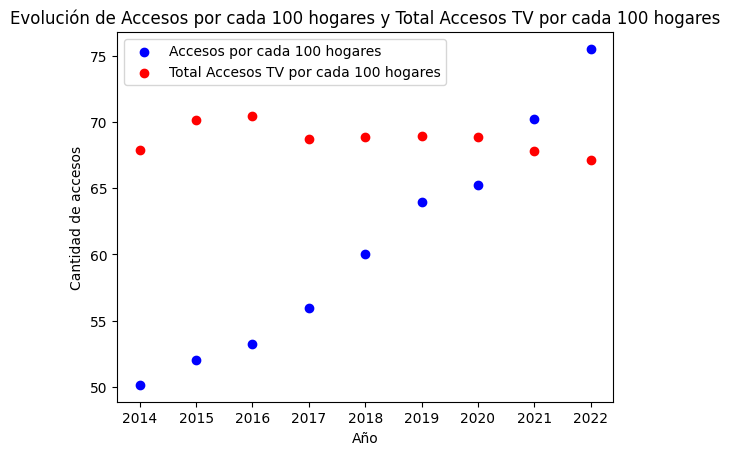

In [118]:
# Crear scatter plot
plt.scatter(corr['Año'], corr['Accesos por cada 100 hogares'], c='blue', label='Accesos por cada 100 hogares')
plt.scatter(corr['Año'], corr['Total Accesos TV por cada 100 hogares'], c='red', label='Total Accesos TV por cada 100 hogares')

# Configurar ejes y etiquetas
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.title('Evolución de Accesos por cada 100 hogares y Total Accesos TV por cada 100 hogares')
plt.legend()

# Mostrar gráfico
plt.show()

No se encuentra una correlación directa entre los accesos a TV y los accesos a internet por cada 100 hogares. Por el contrario, mientras que el acceso a Tv en Argentina podría decirse que se mantiene más o menos estable en el tiempo, el acceso a Internet tiene un crecimiento constante a través de los años

# Crear y cargar BD a MySQL

In [542]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine

### Creación de la Base de Datos: InternetArgentina

In [427]:
ip_dinamic = "localhost"
username = "root"
password = "12345678"
db_name = "InternetArgentina"

# Establecer conexión con el servidor MySQL
conn = pymysql.connect(host=ip_dinamic, user=username, password=password)

# Crear un cursor para ejecutar comandos SQL
cursor = conn.cursor()

# Crear la base de datos si no existe
create_db_query = f"CREATE DATABASE IF NOT EXISTS {db_name}"
cursor.execute(create_db_query)

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

### Cargar los Datos

In [543]:
# Conectar a la base de datos
engine = create_engine(f"mysql+pymysql://{username}:{password}@{ip_dinamic}/{db_name}")

# DataFrames a cargar en la base de datos
dataframes = {
    "penetracion": penetracion,
    "penetracionnacional": penetracionnacional,
    "accesos_nal": accesos_nal,
    "acceso_prov": acceso_prov,
    "velocidad_nal": velocidad_nal,
    "velocidad_prov": velocidad_prov,
    "tecnologias_nal": tecnologias_nal,
    "tecnologias_prov": tecnologias_prov,
    "ingresos": ingresos,
    "hogares": hogares,
    "tv": tv
}

# Cargar los DataFrames en la base de datos
for table_name, dataframe in dataframes.items():
    dataframe.to_sql(name=table_name, con=engine, if_exists="replace", index=False)

# Cerrar la conexión a la base de datos
engine.dispose()

### Diagrama Entidad Relación

![DiagramaER](images/DiagramaER.png)

### Queries

Algunas queries para ver el funcionamiento de la BD y obtener algunos insights

In [546]:
# Provincias con una penetración inferior al 60%
query1 = '''SELECT Año, Provincia, AVG(`Accesos por cada 100 hogares`) AS promedio
FROM penetracion
WHERE Año = 2022
GROUP BY Provincia
HAVING promedio < 60
ORDER BY promedio DESC'''

ask1 = pd.read_sql(query1, con=engine)
ask1

,Año,Provincia,promedio
0,2022,Tucumán,59.28
1,2022,Jujuy,58.10
2,2022,Salta,57.14
3,2022,Misiones,50.62
4,2022,Mendoza,49.72
5,2022,Corrientes,48.07
6,2022,San Juan,47.94
7,2022,Santiago Del Estero,47.62
8,2022,Chaco,43.90
9,2022,Santa Cruz,43.23


In [547]:
# Promedio de uso año a año de las diferentes tecnologías a nivel nacional y variación porcentual

query2 = '''SELECT Año, AVG(ADSL), AVG(Cablemodem),
       AVG(`Fibra óptica`), AVG(Wireless),
       AVG(Otros),
       (AVG(ADSL) - LAG(AVG(ADSL)) OVER (ORDER BY Año)) / LAG(AVG(ADSL)) OVER (ORDER BY Año) * 100 AS variacion_ADSL,
       (AVG(Cablemodem) - LAG(AVG(Cablemodem)) OVER (ORDER BY Año)) / LAG(AVG(Cablemodem)) OVER (ORDER BY Año) * 100 AS variacion_Cablemodem,
       (AVG(`Fibra óptica`) - LAG(AVG(`Fibra óptica`)) OVER (ORDER BY Año)) / LAG(AVG(`Fibra óptica`)) OVER (ORDER BY Año) * 100 AS variacion_Fibra_optica,
       (AVG(Wireless) - LAG(AVG(Wireless)) OVER (ORDER BY Año)) / LAG(AVG(Wireless)) OVER (ORDER BY Año) * 100 AS variacion_Wireless,
       (AVG(Otros) - LAG(AVG(Otros)) OVER (ORDER BY Año)) / LAG(AVG(Otros)) OVER (ORDER BY Año) * 100 AS variacion_Otros
FROM tecnologias_nal
GROUP BY Año
ORDER BY Año DESC;'''
ask2 = pd.read_sql(query2, con=engine)
ask2

,Año,AVG(ADSL),AVG(Cablemodem),AVG(`Fibra óptica`),AVG(Wireless),AVG(Otros),variacion_ADSL,variacion_Cablemodem,variacion_Fibra_optica,variacion_Wireless,variacion_Otros
0,2022,1465616.67,6028203.33,2604786.33,553.06,239.61,-24.86,5.40,60.95,14.80,-4.80
1,2021,1950511.00,5719252.50,1618376.50,481.76,251.70,-14.01,11.38,39.62,23.23,5.09
2,2020,2268207.00,5134991.00,1159155.00,390.95,239.50,-20.74,9.52,45.28,23.83,5.35
3,2019,2861906.50,4688743.50,797852.25,315.71,227.34,-18.13,13.18,195.74,45.15,95.24
4,2018,3495496.00,4142818.00,269781.00,217.51,116.44,-4.49,17.13,40.82,101.01,35.33
5,2017,3659825.50,3537015.75,191578.00,108.21,86.04,-2.88,16.19,12.67,28.29,51.19
6,2016,3768453.50,3044272.00,170031.75,84.35,56.91,-0.28,9.08,9.54,1.80,-6.26
7,2015,3778923.50,2790742.75,155219.25,82.86,60.71,1.55,11.91,2.65,8.58,-15.30
8,2014,3721187.50,2493771.75,151215.50,76.31,71.68,NaN,NaN,NaN,NaN,NaN
